In [389]:
import requests
from bs4 import BeautifulSoup
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
xterra = requests.get("http://xterrabrasil.com.br/tour/costa-verde/#1501462276989-62a8aae3-0a0edf69-d0be")

In [6]:
soup = BeautifulSoup(xterra.content, 'html.parser')

In [178]:
triathlon = soup.find('table', width= '1426').get_text()

In [179]:
triathlon = triathlon.rsplit(sep='\n')

In [182]:
triathlon = list(filter(None, triathlon))

In [202]:
colunas = np.array(triathlon[1:12])[np.newaxis]

In [203]:
tri = pd.DataFrame(columns=colunas[0])

In [208]:
for i in range(len(triathlon)):
    if i == 150:
        break
    a = 13+12*i
    b = 24+12*i
    tri.loc[i] = np.array(triathlon[a:b])[np.newaxis][0]

In [210]:
tri.head(5)

,NÚMERO,NOME,CÓDIGO FAIXA ETÁRIA,COLOCAÇÃO FAIXA ETÁRIA,TEMPO SWIM,T1,TEMPO BIKE,T2,TEMPO RUN,TEMPO TOTAL,EQUIPE
0,218,CARLOS EDUARDO KROTH,M2529,1,00:14:02,00:00:36,00:48:39,00:00:43,00:23:11,01:27:11,(nenhuma)
1,211,MIGUEL REIS LACERDA,M3539,1,00:14:59,00:00:14,00:50:27,00:00:23,00:26:32,01:32:35,(nenhuma)
2,286,YAN MARCELO REIS DE OLIVEIRA,M1519,1,00:13:43,00:00:17,00:54:18,00:00:28,00:24:56,01:33:42,(nenhuma)
3,252,GABRIEL ELIAS DE ALMEIDA,M2024,1,00:15:08,00:00:12,00:51:51,00:00:28,00:26:16,01:33:55,(nenhuma)
4,396,KAYDSON SILVEIRA RABELLO,M3034,1,00:14:51,00:00:14,00:52:09,00:00:32,00:26:47,01:34:33,(nenhuma)


In [229]:
tri["RANK GERAL"] = np.arange(1,151)

In [231]:
tri[tri.NOME=="ARTHUR LAMBLET VAZ"]

,NÚMERO,NOME,CÓDIGO FAIXA ETÁRIA,COLOCAÇÃO FAIXA ETÁRIA,TEMPO SWIM,T1,TEMPO BIKE,T2,TEMPO RUN,TEMPO TOTAL,EQUIPE,RANK GERAL
79,317,ARTHUR LAMBLET VAZ,M2529,7,00:22:29,00:01:27,01:15:48,00:01:42,00:35:06,02:16:32,(nenhuma),80


In [230]:
tri.tail(5)

,NÚMERO,NOME,CÓDIGO FAIXA ETÁRIA,COLOCAÇÃO FAIXA ETÁRIA,TEMPO SWIM,T1,TEMPO BIKE,T2,TEMPO RUN,TEMPO TOTAL,EQUIPE,RANK GERAL
145,248,PETERSON TUPINAMBÁ DA SILVA,M3539,40,00:33:00,00:00:59,01:41:02,00:01:30,00:54:09,03:10:40,SPT – Sidney Pereira team,146
146,444,PEDRO CAMPOS JUNIOR,M4044,36,00:23:34,00:01:22,01:42:14,00:01:11,01:03:03,03:11:24,(nenhuma),147
147,312,LUIZ ANTONIO SCOTTON JUNIOR,M3034,26,00:43:18,00:01:03,01:38:56,00:00:56,00:51:58,03:16:11,(nenhuma),148
148,321,FELIPE NÉRI CARVALHO AGUIAR,M4044,37,00:26:37,00:05:42,01:47:07,00:01:17,01:00:10,03:20:53,(nenhuma),149
149,220,LUIS ALBERTO BIROLI,M4549,14,00:23:02,00:01:01,01:49:53,00:02:46,01:09:33,03:26:15,MASTER SPORT GUARULHOS,150


In [289]:
tri["TEMPO SWIM"] = tri["TEMPO SWIM"].apply(str)
tempo = tri["TEMPO SWIM"].str.split(":", n = 3, expand = True)
tri["TEMPO SWIM"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [292]:
tri["TEMPO BIKE"] = tri["TEMPO BIKE"].apply(str)
tempo = tri["TEMPO BIKE"].str.split(":", n = 3, expand = True)
tri["TEMPO BIKE"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [294]:
tri["TEMPO RUN"] = tri["TEMPO RUN"].apply(str)
tempo = tri["TEMPO RUN"].str.split(":", n = 3, expand = True)
tri["TEMPO RUN"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [303]:
tri["T1"] = tri["T1"].apply(str)
tempo = tri["T1"].str.split(":", n = 3, expand = True)
tri["T1"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [304]:
tri["T2"] = tri["T2"].apply(str)
tempo = tri["T2"].str.split(":", n = 3, expand = True)
tri["T2"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [305]:
tri["TEMPO TOTAL"] = tri["TEMPO TOTAL"].apply(str)
tempo = tri["TEMPO TOTAL"].str.split(":", n = 3, expand = True)
tri["TEMPO TOTAL"] = pd.to_numeric(tempo[0])*60+pd.to_numeric(tempo[1])+pd.to_numeric(tempo[2])/60

In [302]:
nado = go.Histogram(x=tri["TEMPO SWIM"],
    opacity=0.75,name='Nado',xbins=dict(size=5))
bike = go.Histogram(x=tri["TEMPO BIKE"],
    opacity=0.75,name='Bike',xbins=dict(size=5))
corrida = go.Histogram(x=tri["TEMPO RUN"],
    opacity=0.75,name='Corrida',xbins=dict(size=5))

data = [nado, bike, corrida]
layout = go.Layout(barmode='overlay',
                  title='Histograma',
    xaxis=dict(
        title='Valor'
    ),
    yaxis=dict(
        title='Frequencia'
    ))
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [307]:
t1 = go.Histogram(x=tri["T1"],
    opacity=0.75,name='Transição 1',xbins=dict(size=0.5))
t2 = go.Histogram(x=tri["T2"],
    opacity=0.75,name='Transição 2',xbins=dict(size=0.5))

data = [t1, t2]
layout = go.Layout(barmode='overlay',
                  title='Histograma em percentual',
    xaxis=dict(
        title='Valor'
    ),
    yaxis=dict(
        title='Frequencia'
    ))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [308]:
set(tri["CÓDIGO FAIXA ETÁRIA"])

{'M1519',
 'M2024',
 'M2529',
 'M3034',
 'M3539',
 'M4044',
 'M4549',
 'M5054',
 'M5559',
 'M6064',
 'M6569'}

In [320]:
tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M1519", ["TEMPO TOTAL"]]

,TEMPO TOTAL
2,93.700000
42,117.616667


In [416]:
M1519 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M1519", ["TEMPO TOTAL"]],
    opacity=0.75,name='M1519',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M1519", ["RANK GERAL"]],
    mode = 'markers')
M2024 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2024", ["TEMPO TOTAL"]],
    opacity=0.75,name='M2024',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2024", ["RANK GERAL"]],
    mode = 'markers')
M2529 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2529", ["TEMPO TOTAL"]],
    opacity=0.75,name='M2529',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2529", ["RANK GERAL"]],
    mode = 'markers')
M3034 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3034", ["TEMPO TOTAL"]],
    opacity=0.75,name='M3034',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3034", ["RANK GERAL"]],
    mode = 'markers')
M3539 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3539", ["TEMPO TOTAL"]],
    opacity=0.75,name='M3539',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3539", ["RANK GERAL"]],
    mode = 'markers')
M4044 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4044", ["TEMPO TOTAL"]],
    opacity=0.75,name='M4044',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4044", ["RANK GERAL"]],
    mode = 'markers')
M5054 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5054", ["TEMPO TOTAL"]],
    opacity=0.75,name='M5054',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5054", ["RANK GERAL"]],
    mode = 'markers')
M4549 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4549", ["TEMPO TOTAL"]],
    opacity=0.75,name='M4549',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4549", ["RANK GERAL"]],
    mode = 'markers')
M5559 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5559", ["TEMPO TOTAL"]],
    opacity=0.75,name='M5559',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5559", ["RANK GERAL"]],
    mode = 'markers')
M6064 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6064", ["TEMPO TOTAL"]],
    opacity=0.75,name='M6064',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6064", ["RANK GERAL"]],
    mode = 'markers')
M6569 = go.Scatter(y=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6569", ["TEMPO TOTAL"]],
    opacity=0.75,name='M6569',x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6569", ["RANK GERAL"]],
    mode = 'markers')


data = [M1519, M2024,M2529,M3034,M3539,M4044,M4549,M5054, M5559,M6064,M6569]
layout = go.Layout(barmode='overlay',
                  title='',
    xaxis=dict(
        title='RANK GERAL'
    ),
    yaxis=dict(
        title='TEMPO TOTAL'
    ))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [333]:
M1519 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M1519", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M1519',xbins=dict(size=5))
M2024 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2024", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M2024',xbins=dict(size=5))
M2529 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2529", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M2529',xbins=dict(size=5))
M3034 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3034", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M3034',xbins=dict(size=5))
M3539 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3539", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M3539',xbins=dict(size=5))
M4044 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4044", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M4044',xbins=dict(size=5))
M5054 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5054", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M5054',xbins=dict(size=5))
M4549 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4549", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M4549',xbins=dict(size=5))
M5559 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5559", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M5559',xbins=dict(size=5))
M6064 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6064", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M6064',xbins=dict(size=5))
M6569 = go.Histogram(x=tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6569", ["CÓDIGO FAIXA ETÁRIA"]],
    opacity=0.75,name='M6569',xbins=dict(size=5))


data = [M1519, M2024,M2529,M3034,M3539,M4044,M4549,M5054, M5559,M6064,M6569]
layout = go.Layout(barmode='overlay',
                  title='',
    xaxis=dict(
        title='Categoria'
    ),
    yaxis=dict(
        title='Quantidade de participante'
    ))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [361]:
dic ={"M1519":round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M1519", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M2024":round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2024", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M2529" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M2529", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M3034" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3034", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M3539" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M3539", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M4044" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4044", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M5054" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5054", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M4549" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M4549", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M5559" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M5559", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M6064" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6064", ["CÓDIGO FAIXA ETÁRIA"]])/150,2),
"M6569" :round(len(tri.loc[tri["CÓDIGO FAIXA ETÁRIA"]=="M6569", ["CÓDIGO FAIXA ETÁRIA"]])/150,2)}

In [368]:
df = pd.DataFrame(list(dic.items()), columns=['Categoria', 'Percentual'])

In [374]:
bar = go.Pie(labels = df['Categoria'],
            values = df['Percentual'], name = 'Percentual do total por categoria',opacity=0.75)

data = [bar]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [ ]:
z=tri.loc[:,["CÓDIGO FAIXA ETÁRIA",
                                "COLOCAÇÃO FAIXA ETÁRIA","TEMPO SWIM","T1",
                                "TEMPO BIKE","T2","TEMPO RUN","TEMPO TOTAL","RANK GERAL"]]


In [398]:
z["CÓDIGO FAIXA ETÁRIA"] = pd.Series(z["CÓDIGO FAIXA ETÁRIA"], dtype="category")
z["COLOCAÇÃO FAIXA ETÁRIA"] = z["COLOCAÇÃO FAIXA ETÁRIA"].astype(int)

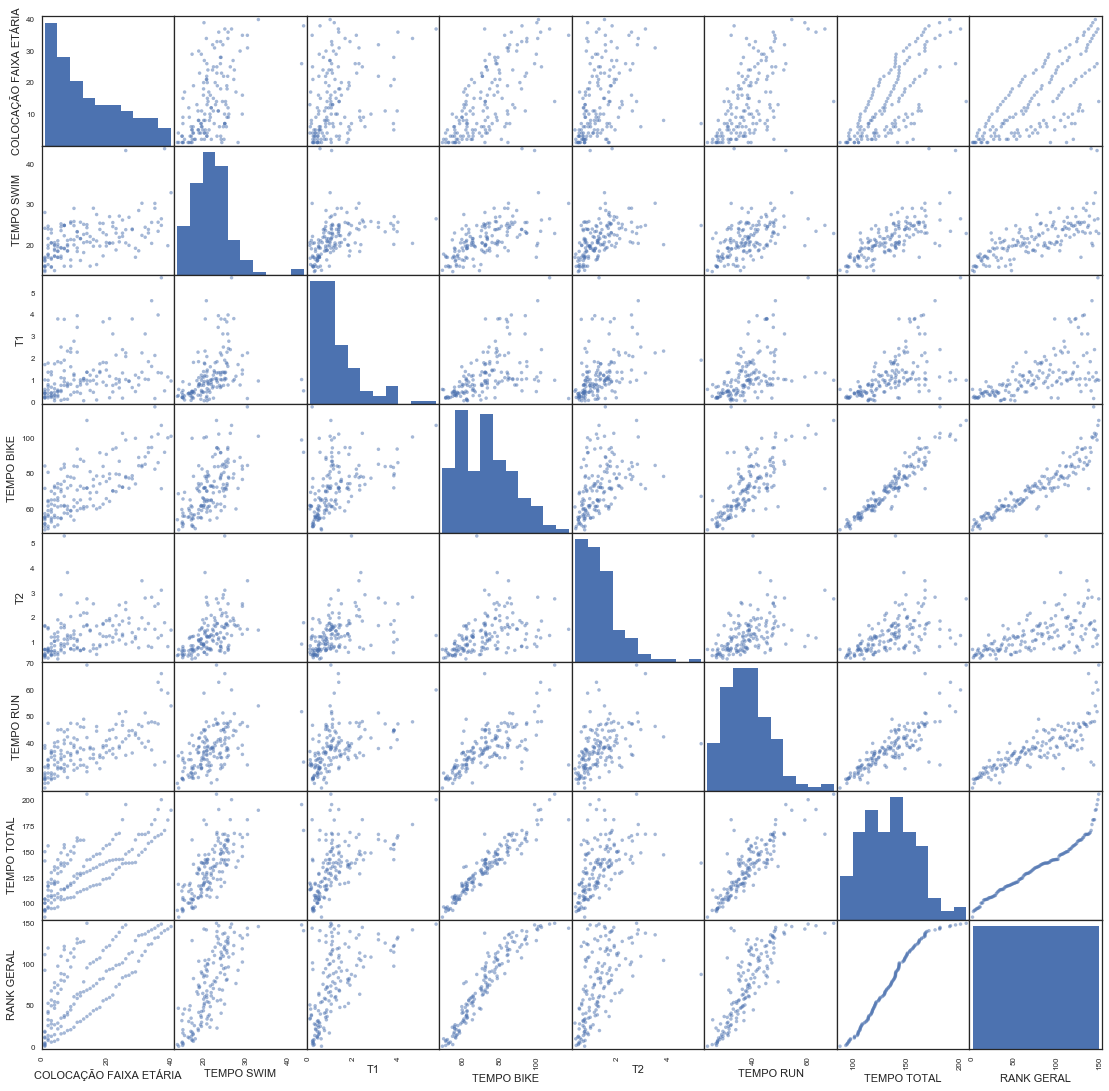

In [414]:
pd.plotting.scatter_matrix(z, figsize=(19, 19))
plt.show()

In [395]:
print(z.corr())

             TEMPO SWIM        T1  TEMPO BIKE        T2  TEMPO RUN  \
TEMPO SWIM     1.000000  0.375724    0.615338  0.436989   0.472790   
T1             0.375724  1.000000    0.511756  0.442356   0.486846   
TEMPO BIKE     0.615338  0.511756    1.000000  0.420733   0.709179   
T2             0.436989  0.442356    0.420733  1.000000   0.484485   
TEMPO RUN      0.472790  0.486846    0.709179  0.484485   1.000000   
TEMPO TOTAL    0.721307  0.576335    0.953352  0.528791   0.855932   
RANK GERAL     0.720885  0.597625    0.935307  0.563683   0.823227   

             TEMPO TOTAL  RANK GERAL  
TEMPO SWIM      0.721307    0.720885  
T1              0.576335    0.597625  
TEMPO BIKE      0.953352    0.935307  
T2              0.528791    0.563683  
TEMPO RUN       0.855932    0.823227  
TEMPO TOTAL     1.000000    0.980776  
RANK GERAL      0.980776    1.000000  


In [400]:
print(z.describe())

       COLOCAÇÃO FAIXA ETÁRIA  TEMPO SWIM          T1  TEMPO BIKE          T2  \
count              150.000000  150.000000  150.000000  150.000000  150.000000   
mean                14.106667   21.738222    1.221556   72.266111    1.319222   
std                 10.961890    4.646452    1.016390   14.422869    0.753722   
min                  1.000000   13.716667    0.083333   48.650000    0.333333   
25%                  5.000000   18.804167    0.500000   61.225000    0.750000   
50%                 11.000000   21.108333    0.983333   71.758333    1.191667   
75%                 22.000000   24.412500    1.475000   81.116667    1.683333   
max                 40.000000   43.766667    5.700000  117.500000    5.316667   

        TEMPO RUN  TEMPO TOTAL  RANK GERAL  
count  150.000000   150.000000  150.000000  
mean    38.088000   134.633000   75.500000  
std      8.209809    25.113134   43.445368  
min     23.183333    87.183333    1.000000  
25%     31.887500   114.895833   38.250000  


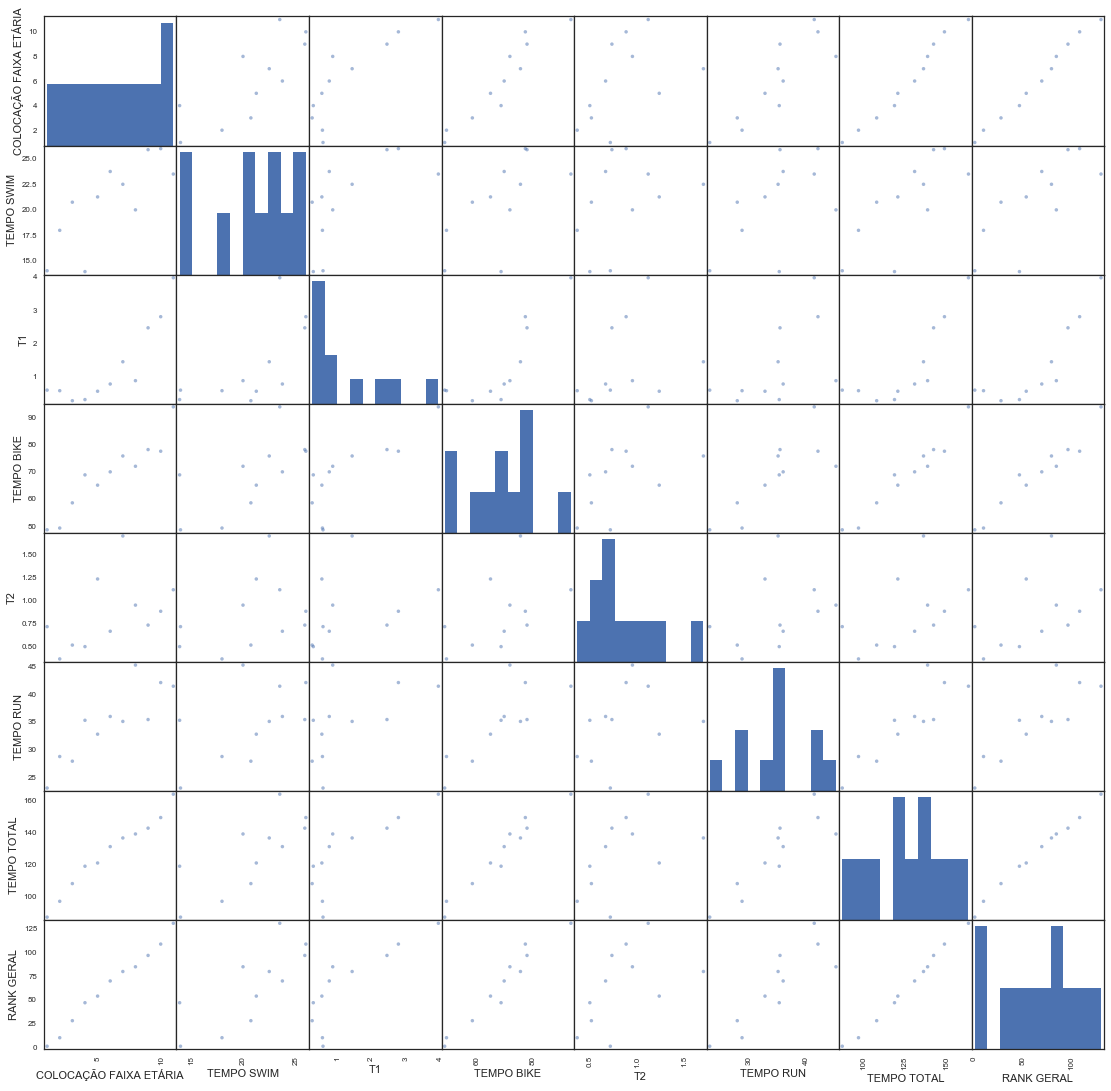

In [406]:
pd.plotting.scatter_matrix(z.loc[z["CÓDIGO FAIXA ETÁRIA"]=="M2529",["CÓDIGO FAIXA ETÁRIA",
                                "COLOCAÇÃO FAIXA ETÁRIA","TEMPO SWIM","T1",
                                "TEMPO BIKE","T2","TEMPO RUN","TEMPO TOTAL","RANK GERAL"]], figsize=(19, 19))
plt.show()

In [413]:
w = z.loc[z["CÓDIGO FAIXA ETÁRIA"]=="M2529",["COLOCAÇÃO FAIXA ETÁRIA","TEMPO SWIM","T1",
                                "TEMPO BIKE","T2","TEMPO RUN","TEMPO TOTAL","RANK GERAL"]]
print(w.corr())

                        COLOCAÇÃO FAIXA ETÁRIA  TEMPO SWIM        T1  \
COLOCAÇÃO FAIXA ETÁRIA                1.000000    0.783226  0.851784   
TEMPO SWIM                            0.783226    1.000000  0.657040   
T1                                    0.851784    0.657040  1.000000   
TEMPO BIKE                            0.943524    0.657958  0.815331   
T2                                    0.476167    0.372671  0.352290   
TEMPO RUN                             0.869168    0.535798  0.562782   
TEMPO TOTAL                           0.985140    0.752945  0.807145   
RANK GERAL                            0.993796    0.760916  0.839025   

                        TEMPO BIKE        T2  TEMPO RUN  TEMPO TOTAL  \
COLOCAÇÃO FAIXA ETÁRIA    0.943524  0.476167   0.869168     0.985140   
TEMPO SWIM                0.657958  0.372671   0.535798     0.752945   
T1                        0.815331  0.352290   0.562782     0.807145   
TEMPO BIKE                1.000000  0.509367   0.807276     0.9